<a href="https://colab.research.google.com/github/hei1sme/MAI391_project/blob/main/MAI391_SE194127_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dự đoán nghỉ việc của nhân viên bằng hồi quy Logistic**


## ***Giới thiệu***

### **Mô tả bài toán**  
Dự án này nhằm xây dựng một mô hình **Hồi quy Logistic** để dự đoán khả năng nghỉ việc của nhân viên dựa trên các đặc điểm nhân khẩu học, tài chính và công việc, bao gồm tuổi tác, mức lương, khoảng cách từ nhà đến nơi làm việc, thâm niên tại công ty, mức độ hài lòng, và các yếu tố khác.  

- **Mục tiêu**: Phát triển một mô hình dự báo chính xác biến mục tiêu `Attrition` (nghỉ việc hoặc không), từ đó hỗ trợ doanh nghiệp trong việc đưa ra các chiến lược giữ chân nhân sự hiệu quả.  
- **Dữ liệu sử dụng**: Tập dữ liệu HR Analytics Prediction từ Kaggle, bao gồm thông tin chi tiết về nhân viên và trạng thái nghỉ việc.  
- **Phương pháp tiếp cận**: Áp dụng **Hồi quy Logistic** – một thuật toán phân loại nhị phân phổ biến và phù hợp với bài toán này.  

### **Lý do lựa chọn Hồi quy Logistic**  
- **Tính đơn giản và hiệu quả**: Hồi quy Logistic là một trong những mô hình phân loại nhị phân tiêu chuẩn, dễ triển khai và có hiệu suất tốt với các tập dữ liệu vừa và nhỏ.  
- **Dễ dàng diễn giải kết quả**: Các hệ số của mô hình có thể được sử dụng để đánh giá tác động của từng biến độc lập lên xác suất nghỉ việc của nhân viên.  
- **Khả năng tổng quát hóa tốt**: Hồi quy Logistic có thể hoạt động hiệu quả ngay cả khi tập dữ liệu không quá lớn, giúp tránh tình trạng overfitting so với các mô hình phức tạp hơn.  
- **Ứng dụng thực tế trong lĩnh vực nhân sự**: Mô hình này đã được sử dụng rộng rãi trong phân tích dữ liệu nhân sự để dự đoán xu hướng nghỉ việc và đề xuất các biện pháp can thiệp kịp thời.  

Mô hình này sẽ được đánh giá dựa trên các thước đo phổ biến như **Accuracy, Precision, Recall, F1-score**, và sẽ được trực quan hóa thông qua **Confusion Matrix, đường ROC và AUC** để đảm bảo hiệu suất và tính chính xác.

## ***Nhập Thư Viện***

In [451]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)

sns.set(style="whitegrid")

## ***Nhập Dataset***

In [483]:
# Đọc dữ liệu từ dataset đã upload lên github
url = "https://raw.githubusercontent.com/hei1sme/MAI391_project/refs/heads/main/data/HR-Employee-Attrition.csv"
df = pd.read_csv(url)

# Kiểm tra số dòng và số cột
print(f"Dataset có {df.shape[0]} dòng và {df.shape[1]} cột")

# Xem 5 dòng đầu tiên
df.head()

Dataset có 1470 dòng và 35 cột


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## ***Khám Phá Dữ Liệu***

### Kiểm Tra Thông Tin Dữ Liệu

In [453]:
print("Kích thước dữ liệu:", df.shape)

Kích thước dữ liệu: (1470, 35)


In [454]:
print("\n Thông tin dữ liệu:")
df.info()


 Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Job

In [455]:
print("\n Số lượng giá trị thiếu trong từng cột:")
df.isnull().sum()


 Số lượng giá trị thiếu trong từng cột:


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [456]:
print("\nThống kê mô tả cho các biến số:")
df.describe()


Thống kê mô tả cho các biến số:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Kiểm tra phân phối dữ liệu

In [457]:
print("\nPhân bố của biến mục tiêu (Attrition):")
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)
print(f"Tỷ lệ nhân viên nghỉ việc: {attrition_counts['Yes'] / len(df) * 100:.2f}%")


Phân bố của biến mục tiêu (Attrition):
Attrition
No     1233
Yes     237
Name: count, dtype: int64
Tỷ lệ nhân viên nghỉ việc: 16.12%


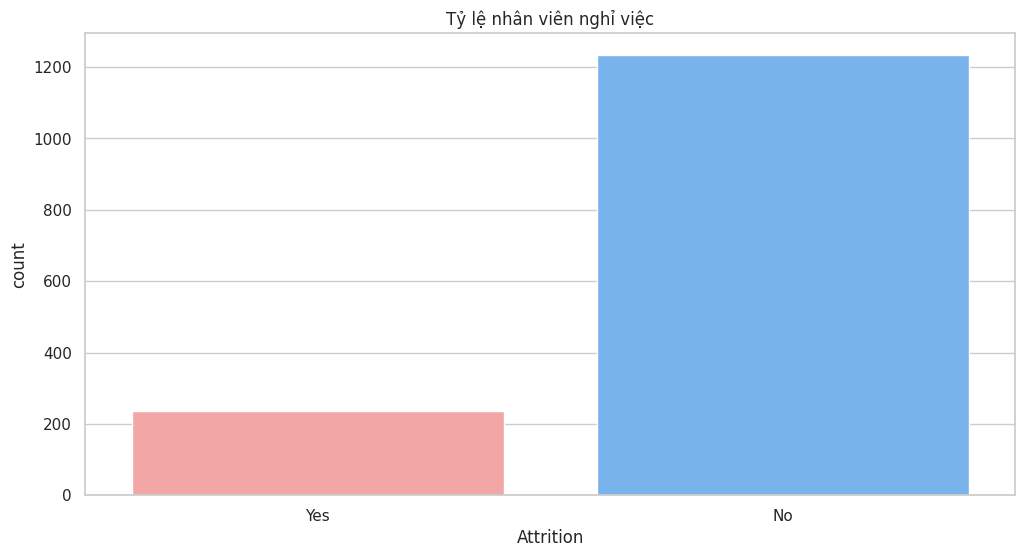

In [465]:
# Kiểm tra phân bố của biến mục tiêu
plt.figure(figsize=(12, 6))
sns.countplot(x="Attrition", data=df, palette=["#ff9999", "#66b3ff"])
plt.title("Tỷ lệ nhân viên nghỉ việc")
plt.show()

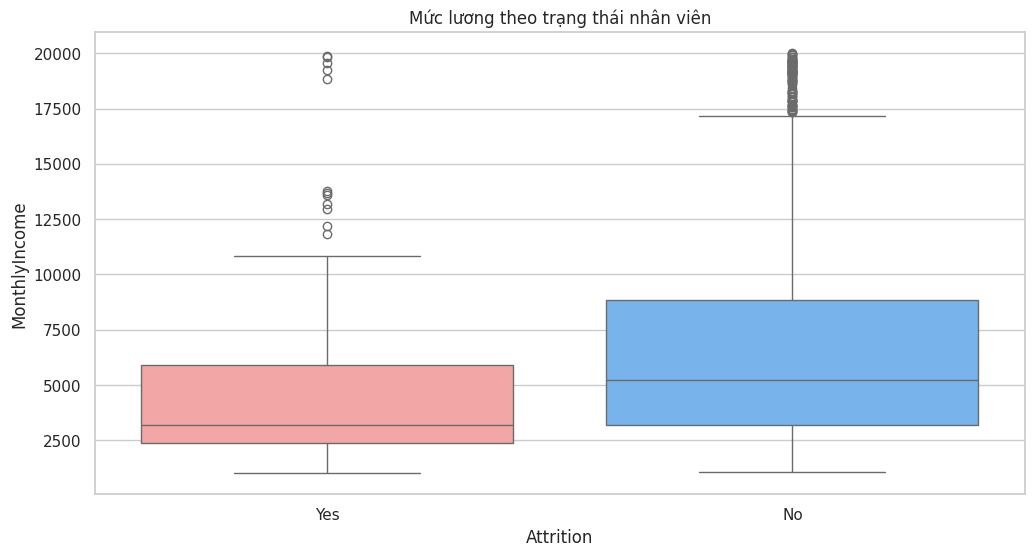

In [460]:
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ hộp cho mức lương theo trạng thái nhân viên
sns.boxplot(x=df["Attrition"], y=df["MonthlyIncome"], data=df, palette=["#ff9999", "#66b3ff"])
plt.title("Mức lương theo trạng thái nhân viên")
plt.show()

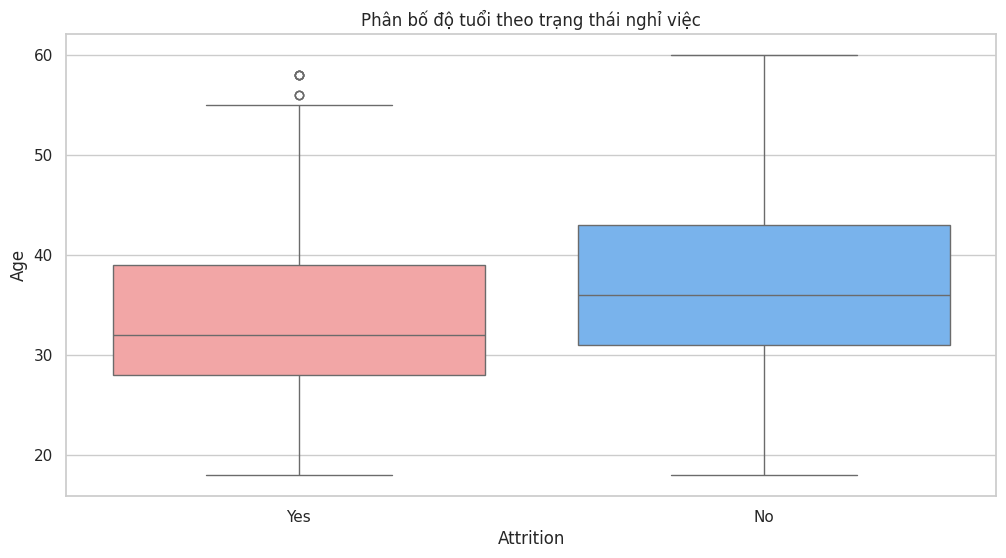

In [466]:
# Phân tích phân bố độ tuổi theo Attrition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='Age', data=df, palette=["#ff9999", "#66b3ff"])
plt.title('Phân bố độ tuổi theo trạng thái nghỉ việc')
plt.show()

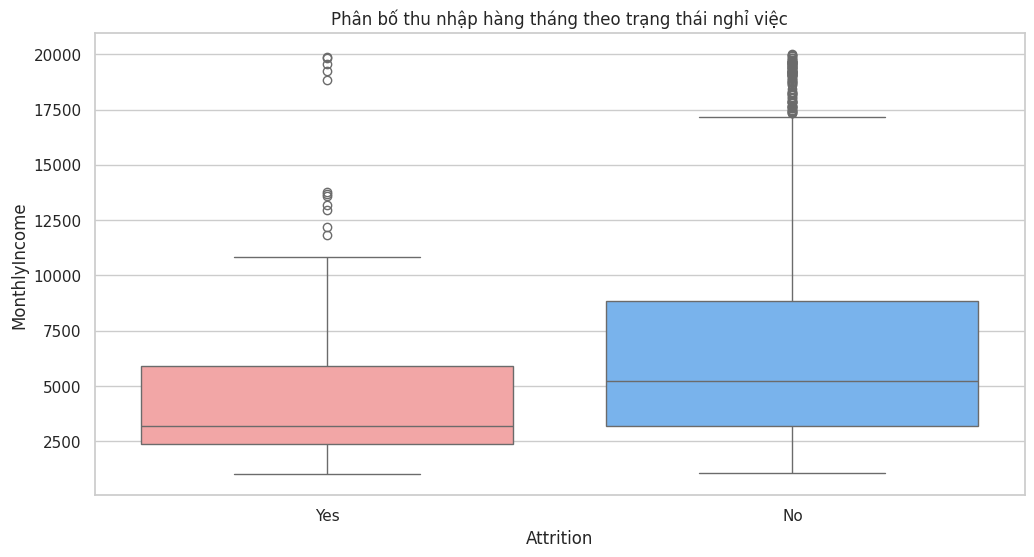

In [467]:
# Phân tích thu nhập hàng tháng theo Attrition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette=["#ff9999", "#66b3ff"])
plt.title('Phân bố thu nhập hàng tháng theo trạng thái nghỉ việc')
plt.show()

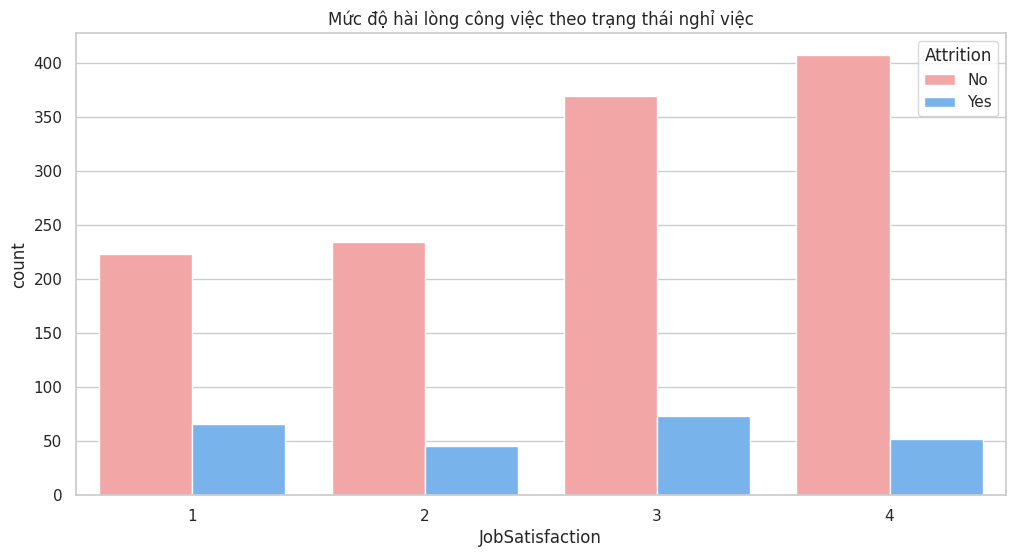

In [463]:
# Phân tích mức độ hài lòng công việc
plt.figure(figsize=(12, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette=["#ff9999", "#66b3ff"])
plt.title('Mức độ hài lòng công việc theo trạng thái nghỉ việc')
plt.show()

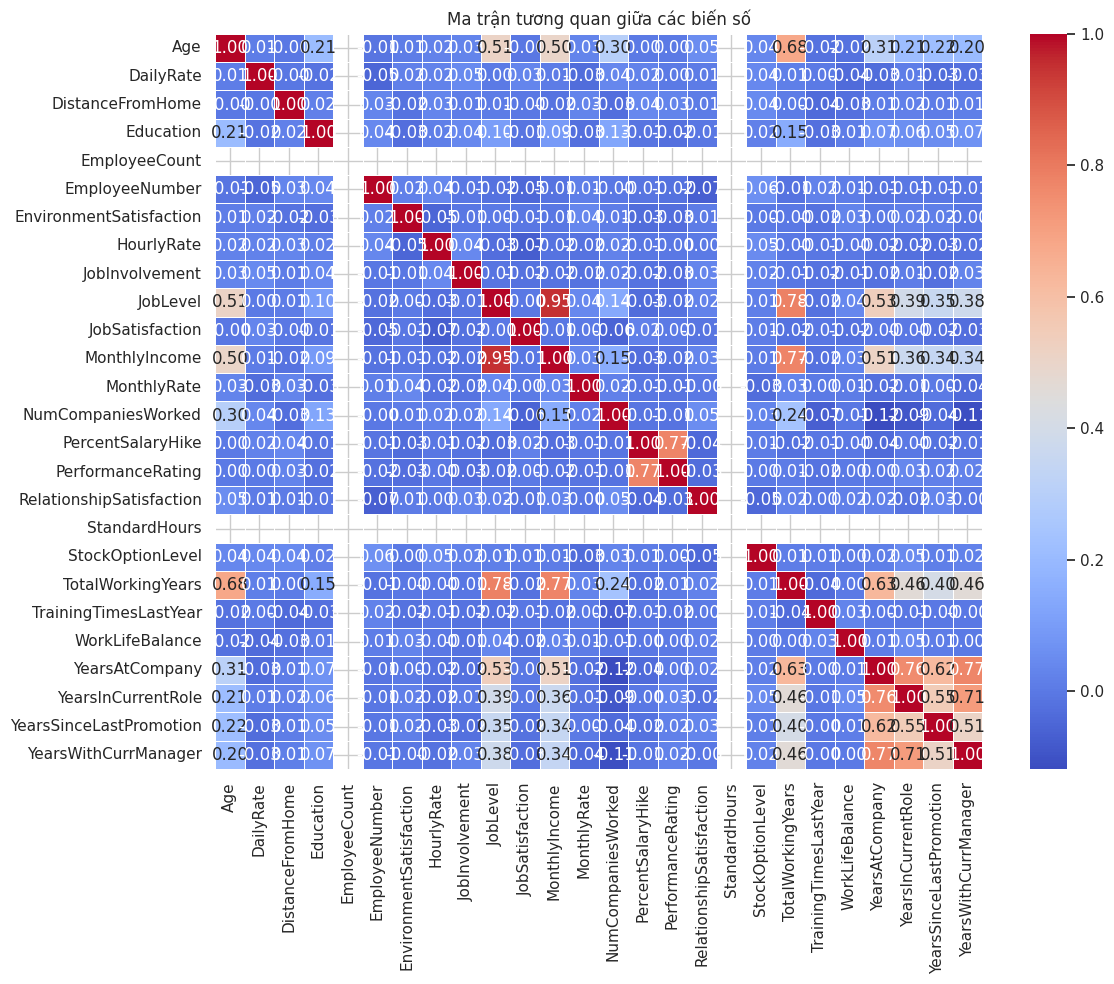

In [434]:
# Chỉ lấy các biến số (numeric)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# Tính toán ma trận tương quan
corr_matrix = numeric_df.corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Ma trận tương quan giữa các biến số')
plt.tight_layout()
plt.show()

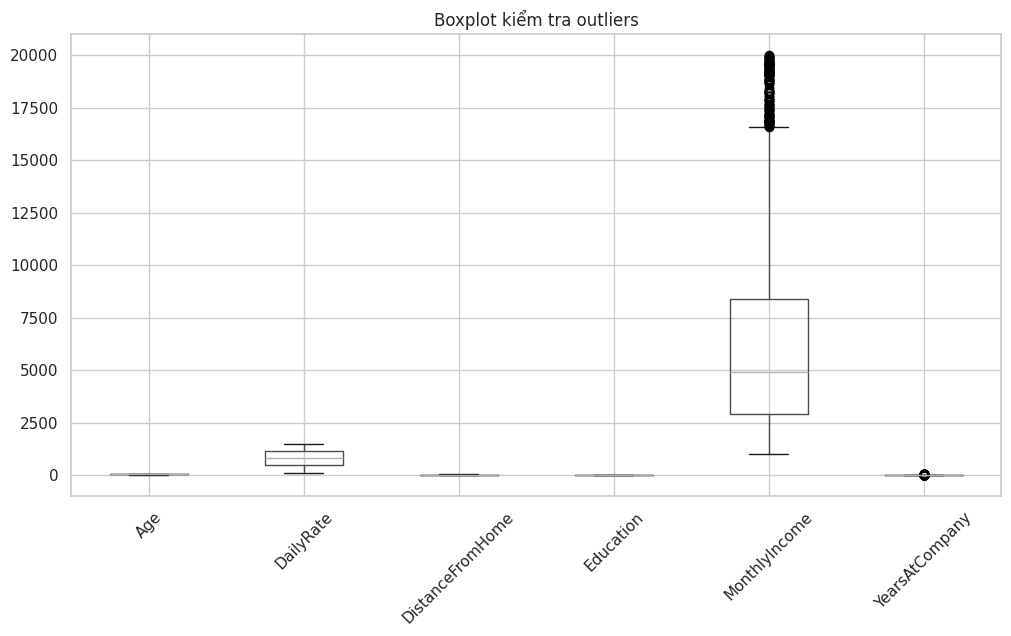

Số lượng outliers theo IQR:
Age                   0
DailyRate             0
DistanceFromHome      0
Education             0
MonthlyIncome       114
YearsAtCompany      104
dtype: int64

Số lượng outliers theo Z-score:
Age                  0
DailyRate            0
DistanceFromHome     0
Education            0
MonthlyIncome        0
YearsAtCompany      25
dtype: int64


In [435]:
# Chọn các cột số
numerical_columns = ["Age", "DailyRate", "DistanceFromHome", "Education", "MonthlyIncome", "YearsAtCompany"]

# Vẽ boxplot để kiểm tra outliers
plt.figure(figsize=(12, 6))
df[numerical_columns].boxplot(rot=45)
plt.title("Boxplot kiểm tra outliers")
plt.show()

# Kiểm tra outliers bằng IQR
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

print("Số lượng outliers theo IQR:")
print(outliers_iqr)

# Kiểm tra outliers bằng Z-score
z_scores = np.abs(zscore(df[numerical_columns]))
outliers_zscore = (z_scores > 3).sum(axis=0)

print("\nSố lượng outliers theo Z-score:")
print(outliers_zscore)


## ***Tiền Xử Lý Dữ Liệu***

### Loại bỏ cột không cần thiết

In [484]:
# Danh sách các cột không cần thiết
columns_to_drop = ["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"]

# Xóa cột
df.drop(columns=columns_to_drop, inplace=True)

# Kiểm tra lại kích thước dataset sau khi loại bỏ cột
print(f"Kích thước mới của dataset: {df.shape}")

Kích thước mới của dataset: (1470, 31)


### Mã hóa dữ liệu

In [485]:
# Mã hóa biến mục tiêu
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Xác định danh sách các cột phân loại
categorical_columns = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]

# Áp dụng One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Kiểm tra dữ liệu sau khi mã hóa
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False


### Loại bỏ Outliners

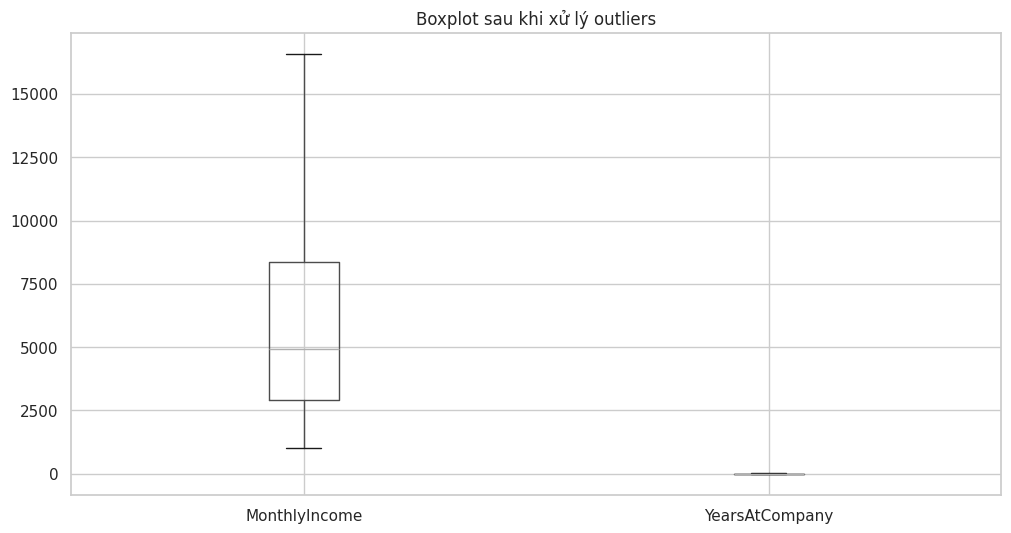

In [486]:
def clip_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(data[column], None, upper_bound)  # Giới hạn giá trị lớn nhất

# Áp dụng cho MonthlyIncome & YearsAtCompany
df["MonthlyIncome"] = clip_outliers(df, "MonthlyIncome")
df["YearsAtCompany"] = clip_outliers(df, "YearsAtCompany")

# Kiểm tra lại boxplot sau khi xử lý outliers
plt.figure(figsize=(12, 6))
df[["MonthlyIncome", "YearsAtCompany"]].boxplot()
plt.title("Boxplot sau khi xử lý outliers")
plt.show()

### Chuẩn hóa dữ liệu

In [487]:
# Danh sách các cột số
numerical_columns = ["Age", "DailyRate", "DistanceFromHome", "Education", "MonthlyIncome", "YearsAtCompany"]

# Khởi tạo bộ chuẩn hóa MinMaxScaler
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Kiểm tra lại dữ liệu sau khi chuẩn hóa
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.547619,1,0.715820,0.000000,0.25,2,94,3,2,4,0.320062,19479,8,11,3,1,0,8,0,1,0.333333,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
1,0.738095,0,0.126700,0.250000,0.00,3,61,2,2,2,0.264642,24907,1,23,4,4,1,10,3,3,0.555556,7,1,7,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,0.452381,1,0.909807,0.035714,0.25,4,92,2,1,3,0.069419,2396,6,15,3,2,0,7,3,3,0.000000,0,0,0,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
3,0.357143,0,0.923407,0.071429,0.75,4,56,3,1,3,0.122014,23159,1,11,3,3,0,8,3,3,0.444444,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,0.214286,0,0.350036,0.035714,0.00,1,40,3,1,2,0.157912,16632,9,12,3,4,1,6,3,3,0.111111,2,2,2,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False


### Chia tập dữ liệu

In [488]:
# Chia tập train/test (80% - 20%)
X = df.drop(columns=["Attrition"])
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Xử lý imbalance

In [489]:
#Áp dụng SMOTE trên tập huấn luyện
print("Trước khi SMOTE:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Sau khi SMOTE:", Counter(y_train_resampled))

Trước khi SMOTE: Counter({0: 986, 1: 190})
Sau khi SMOTE: Counter({0: 986, 1: 986})


In [490]:
# Lưu dataset đã xử lý
processed_file_path = "/content/data/HR-Employee-Attrition-Processed.csv"
df.to_csv(processed_file_path, index=False)
print(f"Dữ liệu sau xử lý đã được lưu tại: {processed_file_path}")

# Kiểm tra kích thước tập dữ liệu
print("Kích thước tập huấn luyện:", X_train_resampled.shape, y_train_resampled.shape)
print("Kích thước tập kiểm tra:", X_test.shape, y_test.shape)

Dữ liệu sau xử lý đã được lưu tại: /content/data/HR-Employee-Attrition-Processed.csv
Kích thước tập huấn luyện: (1972, 44) (1972,)
Kích thước tập kiểm tra: (294, 44) (294,)


## ***Khám Phá Dữ Liệu***

In [491]:
df_proceessed = pd.read_csv("/content/data/HR-Employee-Attrition-Processed.csv")
df_proceessed.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.547619,1,0.715820,0.000000,0.25,2,94,3,2,4,0.320062,19479,8,11,3,1,0,8,0,1,0.333333,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
1,0.738095,0,0.126700,0.250000,0.00,3,61,2,2,2,0.264642,24907,1,23,4,4,1,10,3,3,0.555556,7,1,7,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,0.452381,1,0.909807,0.035714,0.25,4,92,2,1,3,0.069419,2396,6,15,3,2,0,7,3,3,0.000000,0,0,0,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
3,0.357143,0,0.923407,0.071429,0.75,4,56,3,1,3,0.122014,23159,1,11,3,3,0,8,3,3,0.444444,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,0.214286,0,0.350036,0.035714,0.00,1,40,3,1,2,0.157912,16632,9,12,3,4,1,6,3,3,0.111111,2,2,2,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False


## ***Huấn luyện mô hình Logistic Regression***

### Huấn luyện mô hình

In [478]:
# Khởi tạo và huấn luyện mô hình Logistic Regression
model_sklearn = LogisticRegression(max_iter=1000, random_state=42)
model_sklearn.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập kiểm tra
y_pred_sklearn = model_sklearn.predict(X_test)
y_pred_proba_sklearn = model_sklearn.predict_proba(X_test)[:, 1]  # Xác suất thuộc class 1

# Đánh giá mô hình
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

print("\n--- Đánh giá ---")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")
print(f"F1-Score: {f1_sklearn:.4f}")


--- Đánh giá ---
Accuracy: 0.8776
Precision: 0.6341
Recall: 0.5532
F1-Score: 0.5909


### Confusion Matrix

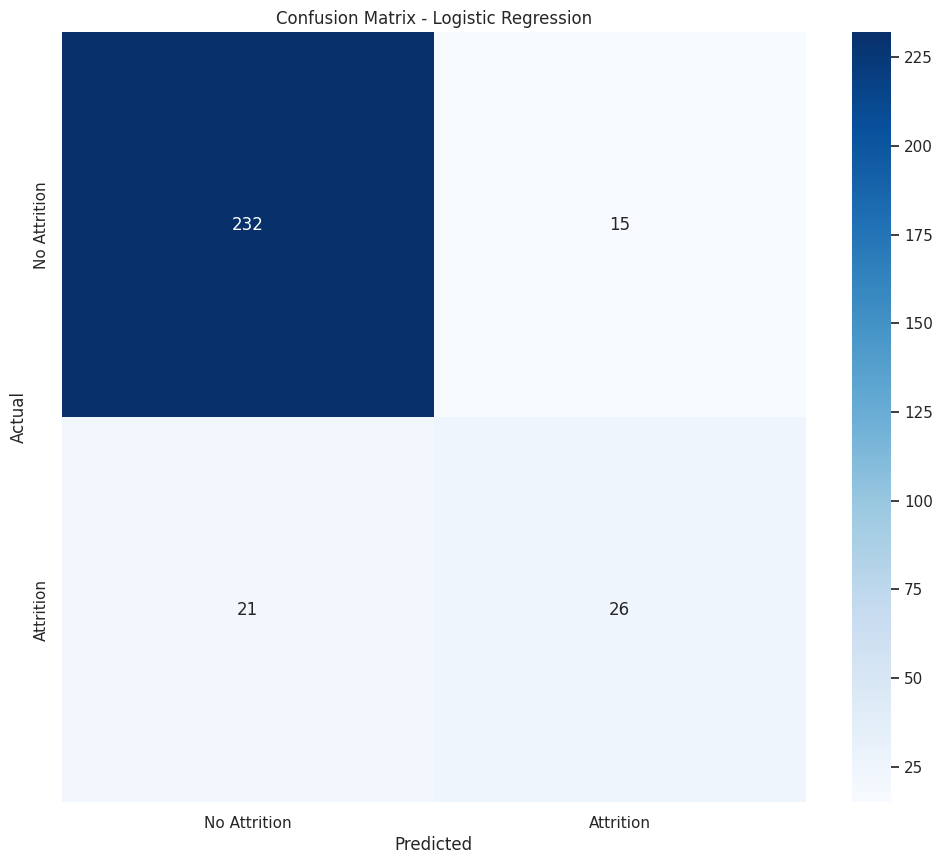

In [479]:
# Confusion Matrix
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_sklearn, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Attrition", "Attrition"],
            yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### ROC Curve

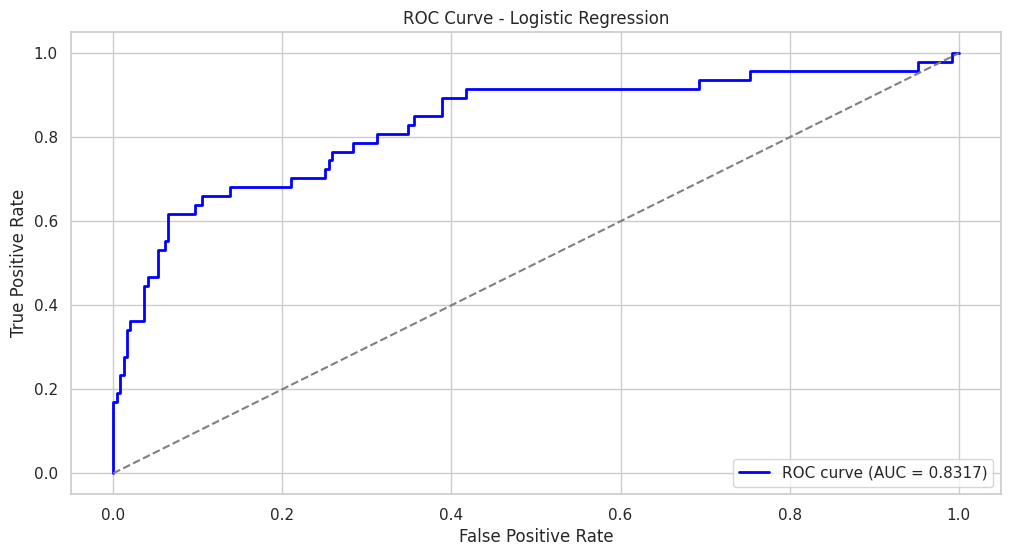

In [480]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_sklearn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

### Precision-Recall Curve

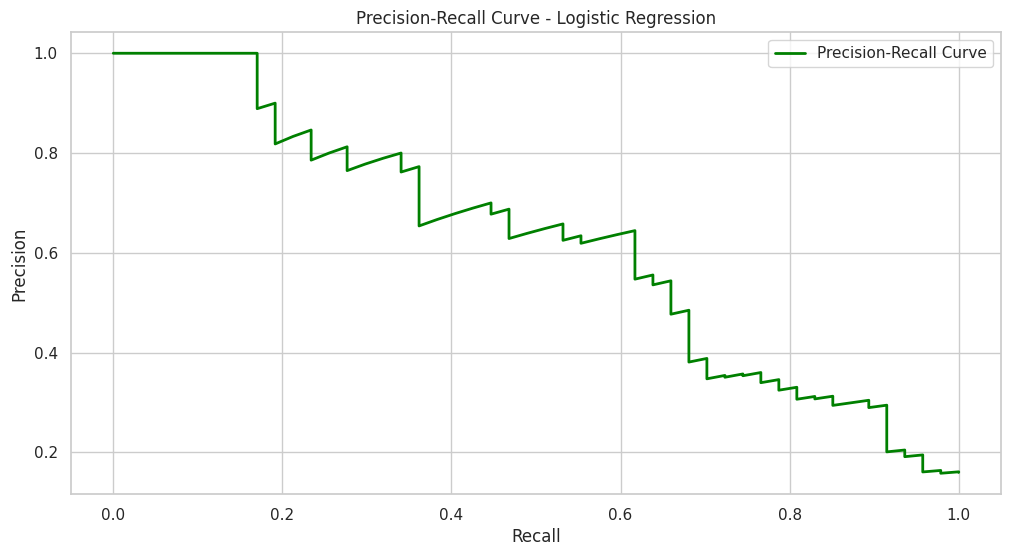

In [471]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_sklearn)

plt.figure(figsize=(12, 6))
plt.plot(recall, precision, color='green', lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend()
plt.show()

### Thực tế và dự đoán

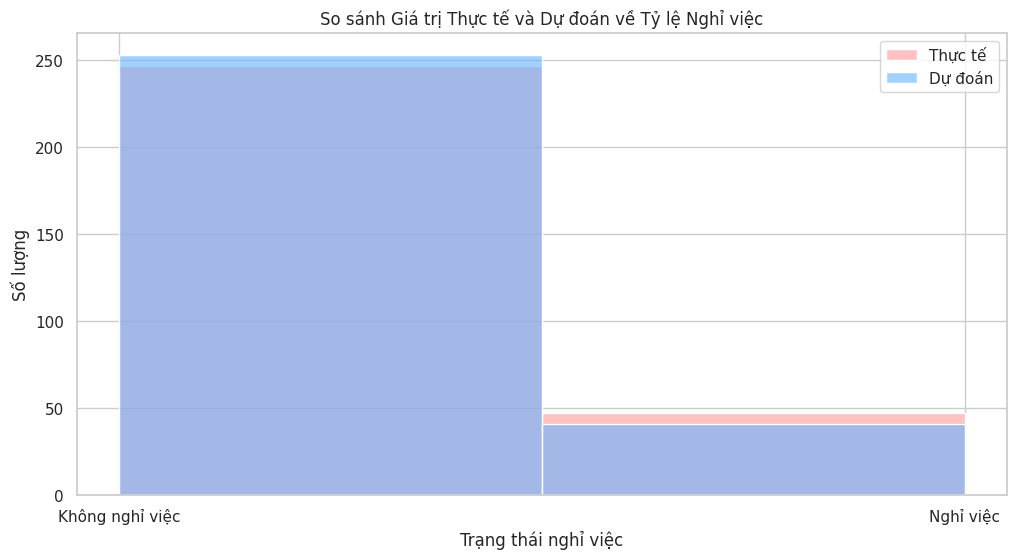

In [475]:
# Định nghĩa bảng màu tùy chỉnh
colors = {"Thực tế": "#ff9999", "Dự đoán": "#66b3ff"}

plt.figure(figsize=(12, 6))

# Sử dụng bảng màu tùy chỉnh cho biểu đồ
sns.histplot(y_test, bins=2, label="Thực tế", color=colors["Thực tế"], alpha=0.6, kde=False)
sns.histplot(y_pred_sklearn, bins=2, label="Dự đoán", color=colors["Dự đoán"], alpha=0.6, kde=False)

# Thêm nhãn, tiêu đề, và chú giải
plt.xlabel("Trạng thái nghỉ việc")
plt.ylabel("Số lượng")
plt.xticks([0, 1], ["Không nghỉ việc", "Nghỉ việc"])
plt.title("So sánh Giá trị Thực tế và Dự đoán về Tỷ lệ Nghỉ việc")
plt.legend()
plt.show()


## ***Đánh giá và Kết luận***  



### **Tổng quan kết quả:**  
- **Accuracy:** 87.76%  
- **Precision:** 63.41%  
- **Recall:** 55.32%  
- **F1-Score:** 59.09%  

### **Nhận xét:**  
1. **Độ chính xác tổng thể cao (~88%)**, cho thấy mô hình hoạt động ổn định trong việc phân loại đúng phần lớn các trường hợp.  

2. **Precision đạt mức 63.41%, nhưng Recall chỉ đạt 55.32%**  
   - Precision cao cho thấy mô hình có tỷ lệ dự đoán đúng các trường hợp nhân viên nghỉ việc tương đối tốt, hạn chế báo sai dương tính.  
   - Recall chưa đạt mức tối ưu, đồng nghĩa với việc vẫn còn nhiều nhân viên có nguy cơ nghỉ việc nhưng không được nhận diện chính xác.  

3. **Hướng cải thiện:**  
   - Điều chỉnh ngưỡng quyết định (threshold) để cân bằng giữa Precision và Recall.  
   - Thực hiện các phương pháp Feature Engineering nhằm khai thác thêm thông tin có giá trị từ dữ liệu.  

4. **Ứng dụng thực tế:**  
   - Để hỗ trợ các doanh nghiệp trong việc dự đoán và quản lý nhân sự, mô hình cần tối ưu Recall nhằm giảm thiểu nguy cơ bỏ sót những nhân viên có khả năng nghỉ việc.  
   - Tích hợp mô hình vào hệ thống quản lý nhân sự có thể giúp doanh nghiệp chủ động đưa ra các biện pháp phù hợp nhằm cải thiện tỷ lệ giữ chân nhân viên.  



### **Kết luận:**  
Mô hình Logistic Regression đã đạt được hiệu suất tương đối tốt trong việc dự đoán tỷ lệ nghỉ việc của nhân viên. Tuy nhiên, để tối ưu hơn cho mục đích thực tế, cần có các điều chỉnh bổ sung hoặc xem xét sử dụng các mô hình phức tạp hơn để cải thiện khả năng dự đoán.